# Syväoppiminen harjoitustyö (max 15 p)

In [1]:
# Kirjoita tähän tietosi!
student_name = Timo Laakkonen
student_id = AA4598


Tehtävässä vertaillaan eri koneoppimismenetelmät (kuusi eri menetelmää) samalle datalle.
Tallennetaan tulokset ja analysoidaan ne.
Esitetään tuloksia myös visuaalisesti (Ennustetarkkuus, sekaannusmatriisi, ROC-käyrä).
Lisäksi vertaillaan saatuja tuloksia sekä pohditaan tuloksia sanallisesti.

### ML: rajaan aineiston vain suorituksiin, joissa on HR

In [ ]:
# KÄytävä kaikki suureet läpi niin selvitetään poikkemat ja virheelliset arvoit

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
#pd.options.display.max_rows = 4000
import warnings
warnings.filterwarnings('ignore')

# HAE POIKKEMAT YMS:
df = pd.read_csv("./data/activities.csv",delimiter=",")

#print(df.columns)

#print(df[:1])

# valitaan pyöräily aktiviteetit
df = df[df['Activity Type'] == 'Ride']

#print(df[1000:1001])


df=df[['Activity Date','Moving Time','Distance','Average Heart Rate','Max Heart Rate','Calories','Activity Name','Average Watts']]
# muutetaan formaati toiseksi niin on helpompi käsitellä
df['Activity DateTime']=pd.to_datetime(df['Activity Date'])

# lisätään pari kenttää
df['Year'] = df['Activity DateTime'].dt.year
df['Month'] = df['Activity DateTime'].dt.month
df['Week'] = df['Activity DateTime'].dt.week
df['Dayofweek'] = df['Activity DateTime'].dt.dayofweek

df['km/h'] = df['Distance'] / (df['Moving Time'] / 3600)

#df["Max Heart Rate"].fillna(0,inplace=True)
#df["Average Heart Rate"].fillna(0,inplace=True)

#df["Max Heart Rate"].dropna()
df2=df.copy()
#df2=df2[["Max Heart Rate","Average Heart Rate"]]

#### HUOM
#df2.dropna(inplace=True)
## HR vain datasta/aineistosta jolloin mittaus on ollut käytössä
df2['diff_max_avg_HR']=df["Max Heart Rate"]-df["Average Heart Rate"]
min=df2['diff_max_avg_HR'].min()
print(min)
max=df2['diff_max_avg_HR'].max()
print(max)
print("milloin nämä oli ja mitkä olivat muut arvot tuolloin")
result=df2.loc[df2['diff_max_avg_HR']==max]
display(result)
print("------------------------------")
result=df2.loc[df2['diff_max_avg_HR']==min]
display(result)
print("pienin ero on selvä tapaus että lyhyt matka suoritetaan tehokkaasti koko matka")



#print(df[:1])
#print(df.columns)
display(round(df["Distance"].max(),2))
display(round(df["Average Heart Rate"].max(),2))
display(round(df["Max Heart Rate"].max(),2))
#display(round(df.mean(),0))
#display(df.min())
#display(df.max())

4.98199462890625
107.5489730834961
milloin nämä oli ja mitkä olivat muut arvot tuolloin


,Activity Date,Moving Time,Distance,Average Heart Rate,Max Heart Rate,Calories,Activity Name,Average Watts,Activity DateTime,Year,Month,Week,Dayofweek,km/h,diff_max_avg_HR
2263,"Aug 21, 2021, 3:21:38 PM",2093.0,15.48,92.451027,200.0,242.0,Evening Ride,304.589111,2021-08-21 15:21:38,2021,8,33,5,26.625896,107.548973


------------------------------


,Activity Date,Moving Time,Distance,Average Heart Rate,Max Heart Rate,Calories,Activity Name,Average Watts,Activity DateTime,Year,Month,Week,Dayofweek,km/h,diff_max_avg_HR
638,"Jun 10, 2015, 11:12:49 AM",449.0,3.6,139.018005,144.0,NaN,10/06/2015 Finland,314.135986,2015-06-10 11:12:49,2015,6,24,2,28.864143,4.981995


pienin ero on selvä tapaus että lyhyt matka suoritetaan tehokkaasti koko matka


111.07

155.79

239.0

### season talvi kevät.... oletus että avg.speed laskee muulloin kuin kesällä nastarenkaat ja vaatetus
TEE FUNKTIOITA siten että eri uureet ja korrelaatiot voidaan völitää parametreina!!!!

[13761.640000000001, 17331.01, 18928.79, 10263.69]
(2502, 16)


,Season,Distance
0,Spring,13761.64
1,Summer,17331.01
2,Autumn,18928.79
3,Winter,10263.69


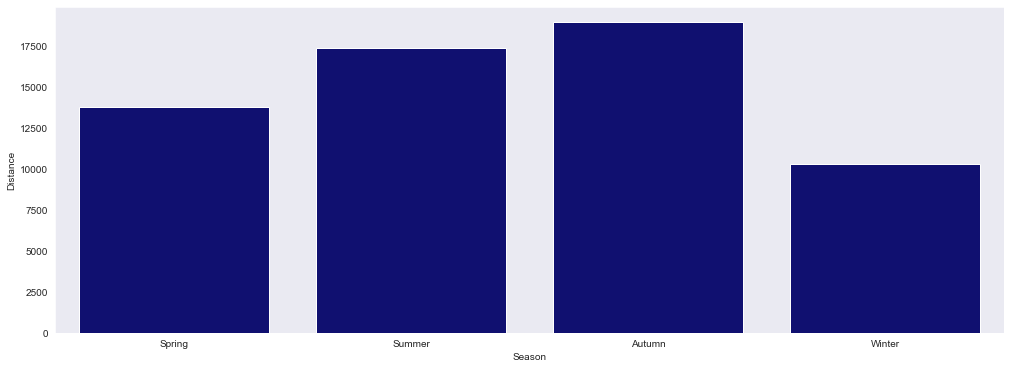

In [103]:
import seaborn as sns

###HUOM

# TEE FUNKTIO

def dropNanRowByColumn(df,column):

    rowsToDrop = df.loc[(df[column].isnull())].index
    df.drop(rowsToDrop,inplace=True) 

    
column="Distance"
dropNanRowByColumn(df2,column)
#print(df2[column])



df2['Season'] = ''
"""
df2.loc[(df2["Month"].isin(["March", "April", "May"])), 'Season'] = 'Spring'
df2.loc[(df2["Month"].isin(["June", "July", "August"])), 'Season'] = 'Summer'
df2.loc[(df2["Month"].isin(["September", "October", "November"])), 'Season'] = 'Autumn'
df2.loc[(df2["Month"].isin(["December", "January", "February"])), 'Season'] = 'Winter'
"""
seasons=['Spring','Summer','Autumn','Winter']

df2.loc[(df2["Month"]>=3) & (df2["Month"]<=5), 'Season'] = seasons[0]
df2.loc[(df2["Month"]>=6) & (df2["Month"]<=8), 'Season'] = seasons[1]
df2.loc[(df2["Month"]>=9) & (df2["Month"]<=11), 'Season'] = seasons[2]
df2.loc[(df2["Month"]>=1) & (df2["Month"]<=2), 'Season'] = seasons[3]
df2.loc[df2["Month"]==12, 'Season'] = seasons[3]
    
## varmistetaan että distance kentässä on arvo

    
    
    
#display(df.isna().sum())

#### HUOMIOITAVA että NaN tapauksesta riipuen ei tule mukaan

#print(df2[:100])
distanceSum=[]
for i in range(len(seasons)):
    dfx=df2.loc[df2["Season"]==seasons[i]]
    distanceSum.append(dfx['Distance'].sum())

print(distanceSum)    

print(df2.shape)

sns.set_style('dark')
plt.figure()
#distance=np.array(distance)
#print(distance)
data={'Season':seasons,'Distance':distanceSum}
data = pd.DataFrame(data)
display(data)

sns.barplot(x='Season', y='Distance', data=data, ci=None, color='navy',dodge=False)
#sns.barplot(x='Month', y='Distance', data=df, hue='Month', ci=None, estimator=np.sum, palette = 'rocket',dodge=False)
plt.gcf().set_size_inches(17, 6)


In [105]:
# km/h Distance HR Calories Relative Effort  Min/max  Max-min/4 eli kaikissa 4 luokkaa 1-4

# kun haetaan min max niin tsekataan koska on tahtuntu ja mitä muut siuureet ovat on season talvi kesä tms.

column='Average Watts'
dropNanRowByColumn(df2,column)

print(df2['Average Watts'].min())
print(df2['Average Watts'].mean())
print(df2['Average Watts'].max())

49.982948303222656
273.99356960428173
609.4481811523438


Machine Learning 
Seuraavassa huono ja liian ennustettava target suure
https://github.com/mocchicone/Strava-Fitness-Analysis Käännöö suomeksi hyvii juttui
https://public.tableau.com/app/profile/john.bruner/viz/FitnessTrackingOverviewFinal/FitnessTrackingDataOverview
https://github.com/mocchicone/Strava-Fitness-Analysis/blob/master/Fitness%20Tracking%20Machine%20Learning.pdf

Tästä saa jutun aihetta analyysiin ja statiikkaan sääolosuhteet viikonloppu eri päivkohtaiset season kohtaiset    
https://towardsdatascience.com/data-driven-cycling-and-workout-prediction-72c393e2542c

Koska sää vaikuttaa huomatavasti suorituarvoihin niin olen ajkanut suoritukset (seasons)
Olisi hyvä lisätä säähän liittyviä tieto (ehkä Stravan maksettu versio pitää sisällään nuokin)
https://www.meteomatics.com/en/weather-api/
https://openweathermap.org/api    
Ehkäpä edelliset kehitettävään osastoon

Etäisyysennustus siis distance
Linear Regression 

Onko regressio korrelaatio kahden suureen välillä ?????
Regression voinee tehdä ainestolle joka on rajattu tsekkaa.ipynb esim. huippu vuiden kuukausi tarkastelu


In [108]:
# max-arvo on ehdottomasti aivan liikaa >400 on arvo virheellinen 350-400 täytyy olla lyhyt pyrys jolloin nopeus suuri
errorData=df2.loc[df2['Average Watts']>380]
print(errorData)

                  Activity Date  Moving Time  Distance  Average Heart Rate  \
629    Jun 3, 2015, 11:53:55 AM        544.0      5.72          135.869003   
2057  Jun 26, 2014, 12:48:12 PM       4565.0     63.81                 NaN   

      Max Heart Rate     Calories                              Activity Name  \
629            146.0          NaN  03/06/2015 Torremolinos, Andalucía, Spain   
2057             NaN  3102.075195                             Afternoon Ride   

      Average Watts   Activity DateTime  Year  Month  Week  Dayofweek  \
629      457.566010 2015-06-03 11:53:55  2015      6    23          2   
2057     609.448181 2014-06-26 12:48:12  2014      6    26          3   

           km/h  diff_max_avg_HR  Season  
629   37.852941        10.130997  Summer  
2057  50.321139              NaN  Summer  


In [ ]:
ML pitää vissiin olla integer jota ennustetaan eli pitää olla luokitus tee luokitus 
mitä suuretta halutaankin ennustaa  SAADAANKO monta suuretta kun yhtä tietoa ennustetaan eli silloihna pitää 
inputissa olla ne suureet eli kaikki suureet annetaava???? onko??? ehkä silloin itää tehdä malli vajailla arvoilla, 
puuttuvaa arvoa muuta kuinn haettavaa ei voida lisäksi ennustaa!!!!


Graafien tulkintaa ja maininta että visualisointi on tärkeää jotta silmäyksellä näkee mihin suuntaan data...
What about heatmap voidaanko soveltaa johonkin

# Luokittelu



In [110]:
# Import the packages and classes needed in this example:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a numpy array of data:
x = np.array([6, 16, 26, 36, 46, 56]).reshape((-1, 1))

print(x)

y = np.array([4, 23, 10, 12, 22, 35])

# Create an instance of a linear regression model and fit it to the data with the fit() function:
model = LinearRegression().fit(x, y) 

# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(x)
print('Predicted response:', y_pred, sep='\n')

[[ 6]
 [16]
 [26]
 [36]
 [46]
 [56]]
coefficient of determination: 0.5417910447761193
intercept: 4.026666666666667
slope: [0.44]
Predicted response:
[ 6.66666667 11.06666667 15.46666667 19.86666667 24.26666667 28.66666667]
